### Εισαγωγή

Στην άσκηση αυτή θα εξερευνήσετε τεχνικές συσταδοποίησης και μείωσης διαστατικότητας σε εικόνες, ξεκινώντας από υπερφασματικά δεδομένα και προχωρώντας σε δεδομένα τηλεπισκόπησης.

- **Μέρος 1**: Θα χρησιμοποιήσετε τη μέθοδο συσταδοποίησης **k-means**, καθώς και την **fuzzy c-means**, σε συνδυασμό με τη μέθοδο μείωσης διαστατικότητας **PCA**, για την ανάλυση μιας υπερφασματικής εικόνας.

- **Μέρος 2**: Θα εργαστείτε με ένα σύνολο δεδομένων τηλεπισκόπησης και, με τη βοήθεια ενός προεκπαιδευμένου CNN, θα εξάγετε χαρακτηριστικά εικόνων για συσταδοποίηση, συγκρίνοντας τα αποτελέσματα με τη συσταδοποίηση με χρήση των pixels.

Ονοματεπώνυμο φοιτητή:

Α.Μ.:Γεώργιος Ανδρονίκου

### 1. Φόρτωση υπερφασματικής εικόνας και των επισημειώσεων της

Κατεβάστε την υπερφασματική εικόνα `salinas_image.npy` και τις αντίστοιχες επισημειώσεις `salinas_labels.npy` από το Google Drive:
https://drive.google.com/drive/folders/1DAKjz0IZkaorrHykD8R0KJctpMBRLqSs?usp=sharing

1.α. Φορτώστε την εικόνα και τις αντίστοιχες επισημειώσεις με χρήση της συνάρτησης np.load.

Image shape: (512, 217, 204)
Labels shape: (512, 217)


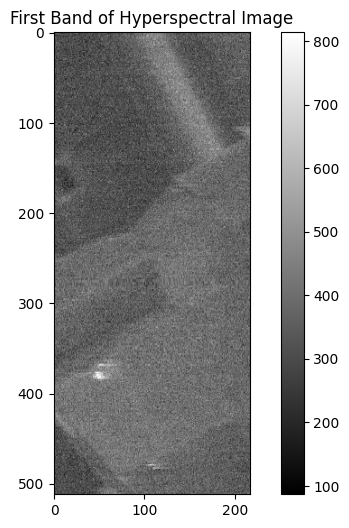

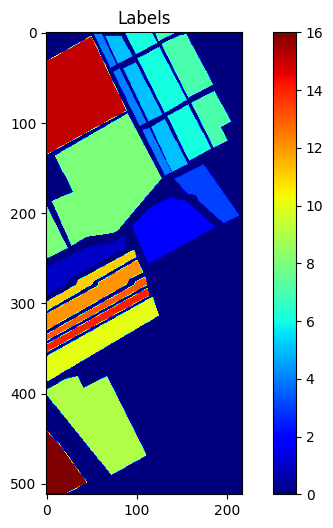

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#load hyperspectral image and labels
image = np.load('salinas_image.npy')
labels = np.load('salinas_labels.npy')

print(f"Image shape: {image.shape}")
print(f"Labels shape: {labels.shape}")

# Display the first band of the image
plt.figure(figsize=(8, 6))
plt.imshow(image[:, :, 0], cmap='gray')
plt.title("First Band of Hyperspectral Image")
plt.colorbar()
plt.show()

# Display the labels
plt.figure(figsize=(8, 6))
plt.imshow(labels, cmap='jet')
plt.title("Labels")
plt.colorbar()
plt.show()

In [4]:
print("Labels_initial", labels)

Labels_initial [[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [16 16 16 ...  0  0  0]
 [16 16 16 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


Οι επισημειώσεις που φορτώσατε αντιστοιχούν κάθε πιξελ της υπερφασματικής εικόνας σε ένα τύπο από 16 διαφορετικές κατηγορίες:

```python
classes = [
    "Background",
    "Broccoli_green_weeds_1",
    "Broccoli_green_weeds_2",
    "Fallow",
    "Fallow_rough_plow",
    "Fallow_smooth",
    "Stubble",
    "Celery",
    "Grapes_untrained",
    "Soil_vineyard_develop",
    "Corn_senesced_green_weeds",
    "Lettuce_romaine_4wk",
    "Lettuce_romaine_5wk",
    "Lettuce_romaine_6wk",
    "Lettuce_romaine_7wk",
    "Vineyard_untrained",
    "Vineyard_vertical_trellis"
]
```

### 2. Οπτικοποίηση και Διερευνητική ανάλυση δεδομένων

Παρουσιάστε με χρήση κώδικα πληροφορίες για τα εξής:

2α. Βρείτε το ύψος και το πλάτος της εικόνας, καθώς και τον αριθμό των υπερφασματικών καναλιών

2β. Σχεδιάστε με χρήση της matplotlib το 3ο, 65ο, και 95ο κανάλι της εικόνας στο ίδιο διάγραμμα

2γ. Υπολογίστε τον αριθμό των διαφορετικών κατηγοριών καλλιέργειας στις επισημειώσεις

2δ. Σχεδιάστε με χρήση της matplotlib τις επισημειώσεις. Προσθέστε επιπλέον επεξηγηματική λεζάντα με χρήση της βιβλιοθήκης κάθε επισημείωσης (χρησιμοποιήστε τη λίστα `classes` που σας δόθηκε προηγουμένως.)

2ε. Υπολογίστε πόσα pixel της εικόνας αντιστοιχούν σε κάθε επισημείωση.

In [5]:
#2.a) Get dimensions of the image
height, width, num_bands = image.shape
print(f"Height: {height}, Width: {width}, Number of Bands: {num_bands}")

Height: 512, Width: 217, Number of Bands: 204


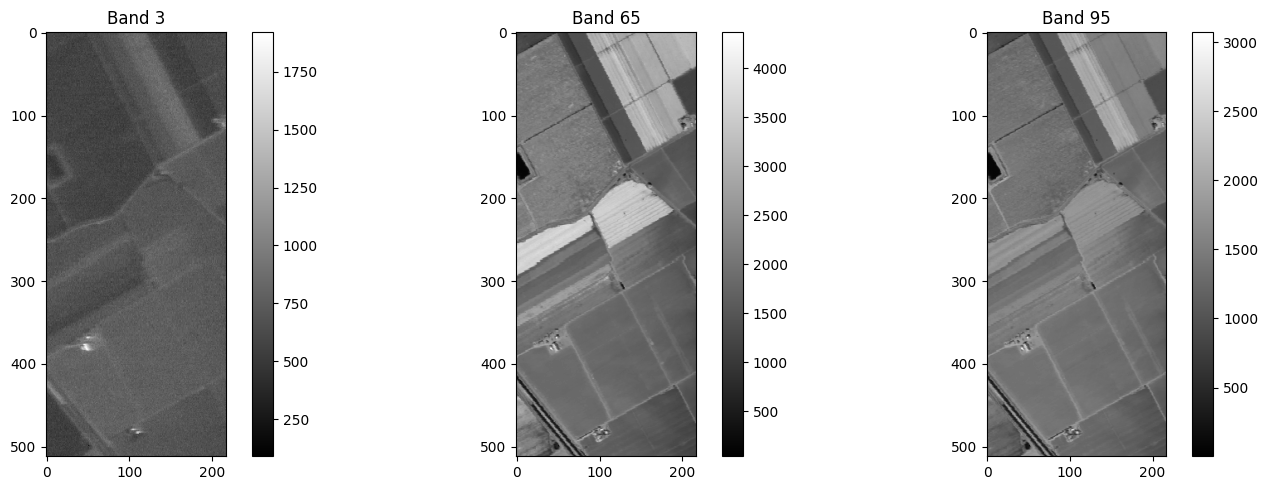

In [7]:
#2.b) Plot the 3rd, 65th, and 95th bands
# Display the 3rd, 65th, and 95th bands
bands_to_display = [3, 65, 95]

plt.figure(figsize=(15, 5))

for i, band in enumerate(bands_to_display, 1):
    plt.subplot(1, 3, i)
    plt.imshow(image[:, :, band - 1], cmap='gray')
    plt.title(f"Band {band}")
    plt.colorbar()

plt.tight_layout()
plt.show()


In [ ]:
#2.c) Get unique categories and their counts
unique_labels, counts = np.unique(labels, return_counts=True)
print(f"Number of unique categories: {len(unique_labels)}")

Number of unique categories: 17


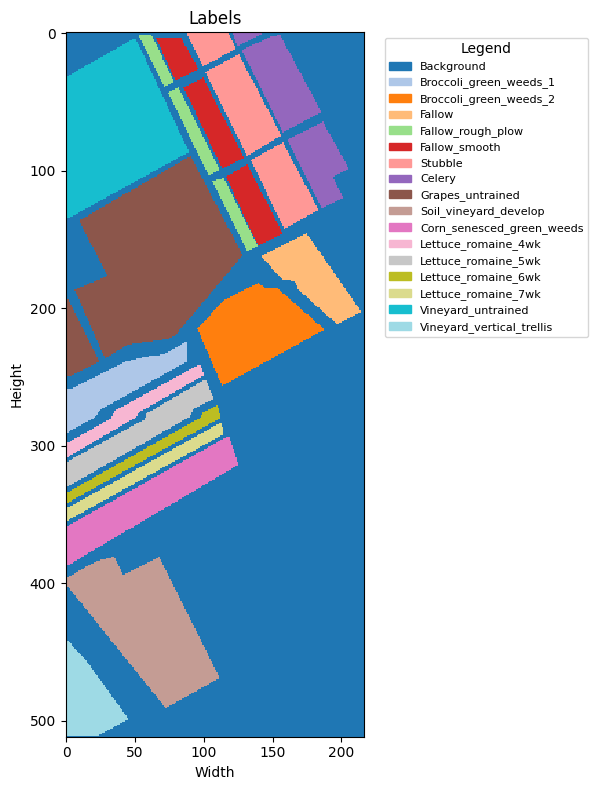

In [ ]:
#2.d) Plot the labels with a legend using the classes list

import matplotlib.patches as mpatches
import matplotlib.colors as mcolors

classes = [
    "Background",
    "Broccoli_green_weeds_1",
    "Broccoli_green_weeds_2",
    "Fallow",
    "Fallow_rough_plow",
    "Fallow_smooth",
    "Stubble",
    "Celery",
    "Grapes_untrained",
    "Soil_vineyard_develop",
    "Corn_senesced_green_weeds",
    "Lettuce_romaine_4wk",
    "Lettuce_romaine_5wk",
    "Lettuce_romaine_6wk",
    "Lettuce_romaine_7wk",
    "Vineyard_untrained",
    "Vineyard_vertical_trellis"
]

# Define the number of classes and colormap
num_classes = len(classes)
cmap = plt.get_cmap('tab20', num_classes)  # Colormap with enough distinct colors
norm = mcolors.Normalize(vmin=0, vmax=num_classes - 1)  # Normalize label indices

plt.figure(figsize=(12, 8))

# Display the label image with consistent colormap
im = plt.imshow(labels, cmap=cmap, norm=norm, interpolation='none')
plt.title("Labels")
plt.xlabel("Width")
plt.ylabel("Height")

# Create legend elements using patches
legend_elements = [
    mpatches.Patch(color=cmap(norm(i)), label=classes[i]) for i in range(num_classes)
]

# Add legend to the plot
plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left', title="Legend", fontsize=8)

plt.tight_layout()
plt.show()

In [ ]:
#2.e) Get pixel count for each label
label_pixel_count = dict(zip(unique_labels, counts))
for label, count in label_pixel_count.items():
    print(f"Label {label} ({classes[label]}): {count} pixels")


Label 0 (Background): 56975 pixels
Label 1 (Broccoli_green_weeds_1): 2009 pixels
Label 2 (Broccoli_green_weeds_2): 3726 pixels
Label 3 (Fallow): 1976 pixels
Label 4 (Fallow_rough_plow): 1394 pixels
Label 5 (Fallow_smooth): 2678 pixels
Label 6 (Stubble): 3959 pixels
Label 7 (Celery): 3579 pixels
Label 8 (Grapes_untrained): 11271 pixels
Label 9 (Soil_vineyard_develop): 6203 pixels
Label 10 (Corn_senesced_green_weeds): 3278 pixels
Label 11 (Lettuce_romaine_4wk): 1068 pixels
Label 12 (Lettuce_romaine_5wk): 1927 pixels
Label 13 (Lettuce_romaine_6wk): 916 pixels
Label 14 (Lettuce_romaine_7wk): 1070 pixels
Label 15 (Vineyard_untrained): 7268 pixels
Label 16 (Vineyard_vertical_trellis): 1807 pixels


### 3. Εύρεση φασματικών υπογραφών

3.α. Μετατρέψτε την υπερφασματική εικόνα και τις επισημειώσεις σε μορφή κατάλληλη για περαιτέρω επεξεργασία. Η εικόνα θα πρέπει να μετατραπεί σε πίνακα N x Κ, όπου Ν τα pixel και K ο αριθμός των καναλιών. Οι επισημειώσεις αντίστοιχα θα πρέπει να μετατραπούν σε διάνυσμα μήκους Ν.

💡 Χρησιμοποιήστε την `numpy reshape`

In [ ]:
height, width, num_bands = image.shape
reshaped_image = image.reshape(height * width , num_bands)
reshaped_labels = labels.flatten() #we can also use reshape for this work too

print("reshaped labels (height x widht):", reshaped_labels.shape)
print("reshaped image (height x width , num_bands):", reshaped_image.shape)

reshaped labels (height x widht): (111104,)
reshaped image (height x width , num_bands): (111104, 204)


Ουσιαστικά , με αυτό τον τρόπο δεν χάνουμε καθόλου πληροφορία καθώς και πάλι καθε γραμμή του πίνακα αντισοιχεί σε ένα πίξελ και οι τιμές που παίρνει σε σε κάθε θέση της γραμμής αναπαριστά την τιμή της εκπεμπόμενης ενέργειας στο αντίστοιχο φασματικό κανάλι(204 φασματικά κανάλια).Αυτό που δεν διατηρείται είναι η χωρική διάταξη των πιξελς στην ΥΕ, όμως δεν μας ενδιαφέρει, γιατί σε αυτή την μορφή μπορούμε να χρησιμοποιήσουμε τα δεδομένα μας για την εισαγωγή τους στους αλγορίθμους που μας ζητούνται

3.β. Επιλέξτε ένα τυχαίο pixel της εικόνα από κάθε κατηγορία, και σχεδιάστε την υπερφασματική υπογραφή των επιλεγμένων πίξελ.

Randomly Selected Pixels for Each Label: {0: 71356, 6: 9031, 7: 7085, 4: 5272, 5: 9652, 15: 11973, 8: 29375, 3: 43609, 2: 54578, 1: 55576, 11: 54549, 12: 57818, 13: 60219, 14: 69069, 10: 71682, 9: 103813, 16: 104403}


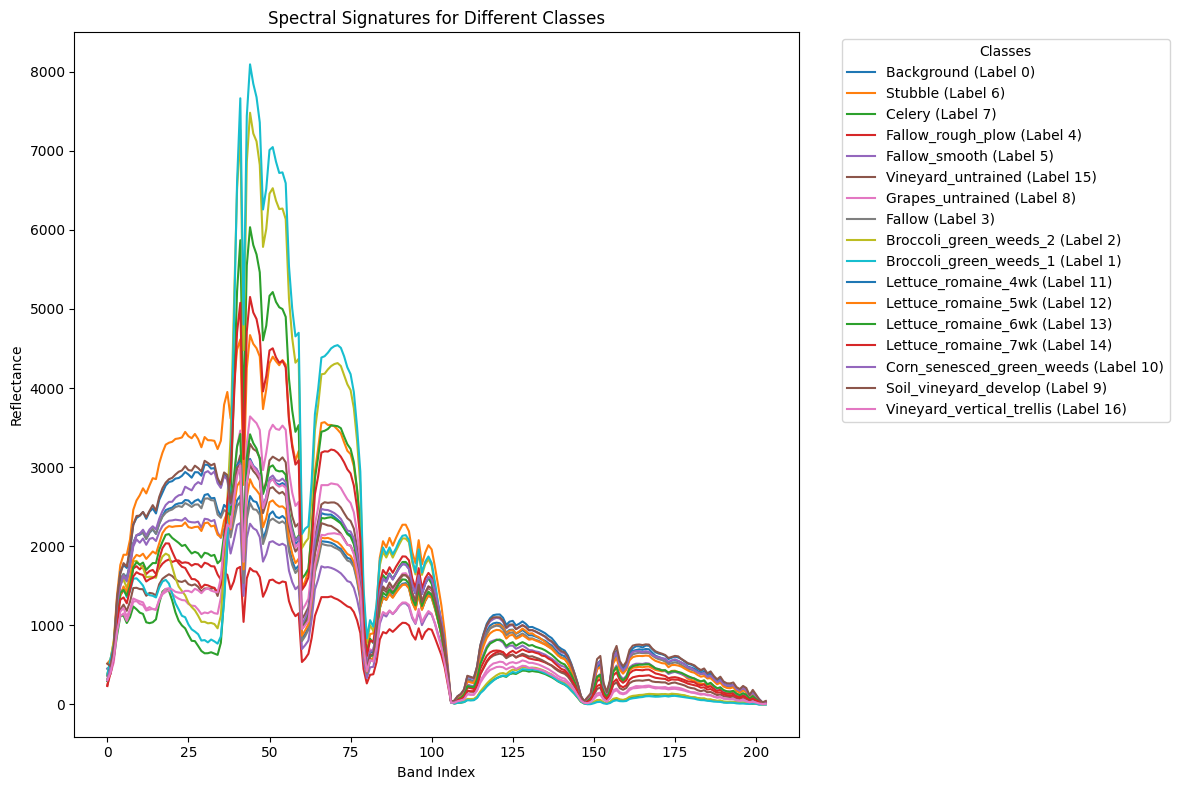

In [ ]:
import random
from collections import defaultdict

label_to_class = {
    0: "Background",
    1: "Broccoli_green_weeds_1",
    2: "Broccoli_green_weeds_2",
    3: "Fallow",
    4: "Fallow_rough_plow",
    5: "Fallow_smooth",
    6: "Stubble",
    7: "Celery",
    8: "Grapes_untrained",
    9: "Soil_vineyard_develop",
    10: "Corn_senesced_green_weeds",
    11: "Lettuce_romaine_4wk",
    12: "Lettuce_romaine_5wk",
    13: "Lettuce_romaine_6wk",
    14: "Lettuce_romaine_7wk",
    15: "Vineyard_untrained",
    16: "Vineyard_vertical_trellis"
}


#Group pixels by label
label_indices = defaultdict(list)  # Dictionary to store indices by label

for idx, label in enumerate(reshaped_labels):
    label_indices[label].append(idx)

#Randomly select one pixel per label
random_pixels = {label: random.choice(indices) for label, indices in label_indices.items()}

#Print selected indices
print("Randomly Selected Pixels for Each Label:", random_pixels)

#Extract spectral signatures for selected pixels
spectral_signatures = {
    label: reshaped_image[idx, :] for label, idx in random_pixels.items()
}

# Print spectral signatures
#for label, signature in spectral_signatures.items():
#    print(f"Label {label}: Spectral Signature {signature}")


# Plot spectral signatures with class names
plt.figure(figsize=(12, 8))
for label, signature in spectral_signatures.items():
    class_name = label_to_class[label]  # Get the class name from the dictionary
    plt.plot(signature, label=f"{class_name} (Label {label})")

plt.title("Spectral Signatures for Different Classes")
plt.xlabel("Band Index")
plt.ylabel("Reflectance")
plt.legend(title="Classes", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


3.γ. Σημειώστε τις παρατηρήσεις σας και τα συμπεράσματα σας. Προσπαθήστε να απαντήσετε στις ακόλουθες ερωτήσεις:
    
* Με βάση τα προηγούμενα διαγράμματα θεωρείτε ότι κάποιες καλλιέργειες είναι πιο εύκολα διαχωρίσιμες από άλλες με βάση τη φασματική υπογραφή τους;
* Θεωρείτε ότι όλα τα κανάλια παρέχουν χρήσιμη πληροφορία για το διαχωρισμό;

3.δ. Σχεδιάστε ένα heatmap, που να δείχνει τη συσχέτιση μεταξύ των διαφορετικών καναλιών

Από της φασματικές υπογραφές που φαίνονται στο πιο πάνω πλότ συμπεραίνουμε:


*   Κάποιες φασματικά κανάλια έχουν αρκετά μεγαλύτερη μεταβλητότητα ως προς τις φασματικές υπογραφές , πράγμα που τα καθιστά πολύ πιο χρήσιμα σε σχέση με αυτά που έχουν μικρή μεταβλητότητα.Παρατηρούμε επίσης ότι σε φασματικά κανάλια με μικρή μεταβλητότητα οι φασματικές υπογραφές μπορεί και να τέμνονται κάνοντας τον διαχωρισμό τους δυσκολότερο εάν λάβουμε υπόψη αυτό το κανάλι.Σε αντίθεση με κανάλια με μεγάλη μεταβλητότητα (πχ 40-55,65-75) που μας είναι αρκετά χρήσιμα καθώς οι φασματικές υπογραφές δεν τέμνονται(χονδρικά) και είναι πιο εύκολα διακρίσιμες
*   Ως προς τις καλλιέργειες , υπάρχουν καλλιέργιες που ακόμη και σε περιοχές καναλιών με μεγάλη μεταβλητότητα τις βλέπουμε να τέμνονται και να μην είναι εύκολα διακρίσιμες.Οπότε δεν μπορούμε να επικεντρωθούμε μόνο σε συγκεκριμένα κανάλια καθώς θα χάσουμε χρήσιμη πληροφορία.Το σωστό είναι να λάβουμε υπόψη ολόκληρη την φασματική υπογραφή.



### 4. Συσταδοποίηση με χρήση του αλγορίθμου KMeans

 4.α. Εφαρμόστε τον αλγόριθμο KMeans (sklearn.cluster) στα δεδομένα (εφόσον κάνατε την προεπεξεργασία του Βήματος 3). Χρησιμοποιήστε την τιμή `n_cluster=17`.

Αξιολογήστε την απόδοση του αλγορίθμου χρησιμοποιώντας τις ακόλουθες μετρικες:

* Adjusted Rand Index
* Silhouette Score

Ο Adjusted Rand Index (ARI) υπολογίζει πόσα ζεύγη σημείων ταξινομήθηκαν σωστά είτε στην ίδια συστάδα είτε σε διαφορετικές συστάδες χρησιμοποιώντας τις πραγματικές κατηγορίες, λαμβάνοντας υπόψη τυχαίες αντιστοιχίσεις. Έχει τιμές από -1 (πολύ κακή συσταδοποίηση) έως 1 (τέλεια ευθυγράμμιση με τις κατηγορίες), ενώ τιμή 0 υποδηλώνει τυχαία συσταδοποίηση. Είναι χρήσιμο για την αξιολόγηση της ακρίβειας σε δεδομένα με γνωστές κατηγορίες.

Αντιθέτως το  Silhouette Score μετρά πόσο καλά ένα σημείο δεδομένων ταιριάζει στη συστάδα του σε σχέση με τις υπόλοιπες συστάδες. Υπολογίζει τη μέση απόσταση ενός σημείου από τα υπόλοιπα σημεία της ίδιας συστάδας (cohesion) και τη μέση απόσταση από τα σημεία της πλησιέστερης άλλης συστάδας (separation). Το σκορ κυμαίνεται από -1 έως 1, όπου τιμές κοντά στο 1 υποδηλώνουν καλά ορισμένες συστάδες, τιμές κοντά στο 0 σημαίνουν αλληλοεπικαλυπτόμενες συστάδες, ενώ αρνητικές τιμές υποδεικνύουν κακή ανάθεση σε συστάδα.

Ο Silhouette Score είναι ένα μέτρο εσωτερικής αξιολόγησης, που εξετάζει τη συνοχή και τον διαχωρισμό των συστάδων χωρίς να λαμβάνει υπόψη πραγματικές κατηγορίες. Αντίθετα, ο Adjusted Rand Index (ARI) είναι μέτρο εξωτερικής αξιολόγησης, που συγκρίνει τις συστάδες με τις πραγματικές κατηγορίες (ground truth). Η χρήση και των δύο μαζί παρέχει μια συνολική εικόνα της ποιότητας της συσταδοποίησης.

In [ ]:
reshaped_image.shape

(111104, 204)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score

# Input data
X = reshaped_image  # 2D matrix where each row is a pixel's spectral signature
true_labels = reshaped_labels  # 1D array of ground truth labels

# Apply KMeans clustering
kmeans = KMeans(n_clusters=17, random_state=42, n_init="auto").fit(X)

# Predicted cluster labels for each pixel
predicted_labels = kmeans.labels_

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

# Evaluate clustering performance
# 1. Adjusted Rand Index (ARI)
ari_score = adjusted_rand_score(true_labels, predicted_labels)

# 2. Silhouette Score
silhouette_avg = silhouette_score(X, predicted_labels)

# Print results
print("Adjusted Rand Index (ARI):", ari_score)
print("Silhouette Score:", silhouette_avg)
print("Cluster Centers Shape:", cluster_centers.shape)  # Should be (17, num_features)


Adjusted Rand Index (ARI): 0.14654750991968155
Silhouette Score: 0.41253853421064896
Cluster Centers Shape: (17, 204)


4.β. Χρησιμοποιώντας τα αποτελέσματα τις συσταδοποίησης, σχεδιάστε πάλι με χρήση της matplotlib την ταξινόμηση σε μορφή εικόνας, χρησιμοποιώντας για κάθε pixel τη συστάδα στην οποία έχει ανατεθεί.

Συγκρίνετε με την αρχική εικόνα των επισημειώσεων. Τι παρατηρείτε;

<ipython-input-16-467272e60331>:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab20', num_classes)  # Ensure the colormap matches the number of classes


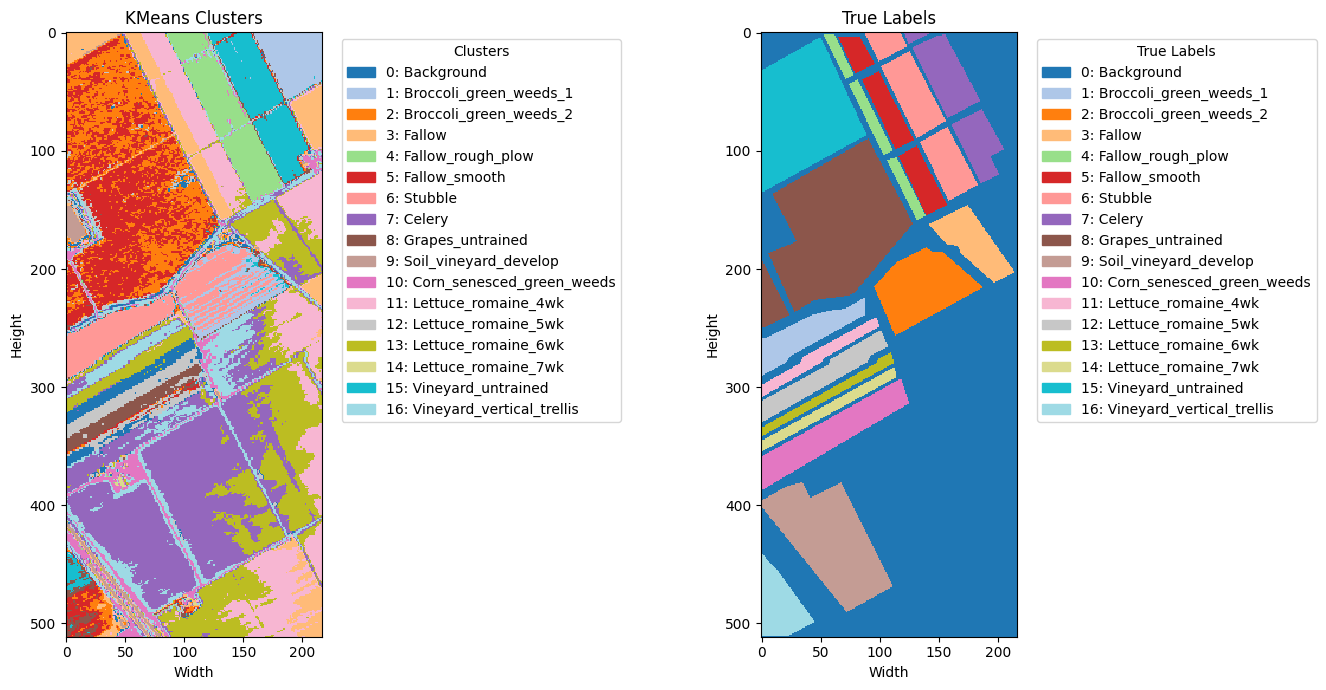

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

# Define label names (mapping to class indices)
label_names = [
    "Background", "Broccoli_green_weeds_1", "Broccoli_green_weeds_2",
    "Fallow", "Fallow_rough_plow", "Fallow_smooth", "Stubble",
    "Celery", "Grapes_untrained", "Soil_vineyard_develop",
    "Corn_senesced_green_weeds", "Lettuce_romaine_4wk",
    "Lettuce_romaine_5wk", "Lettuce_romaine_6wk",
    "Lettuce_romaine_7wk", "Vineyard_untrained",
    "Vineyard_vertical_trellis"
]

# Create a custom colormap where each label has a fixed color
num_classes = len(label_names)
cmap = plt.cm.get_cmap('tab20', num_classes)  # Ensure the colormap matches the number of classes

# Create a color for each class
colors = [cmap(i) for i in range(num_classes)]

# Create legend patches for each label
handles = [
    mpatches.Patch(color=colors[i], label=f"{i}: {name}")
    for i, name in enumerate(label_names)
]

# Reshape the predicted and true label arrays to image format
predicted_image = predicted_labels.reshape(height, width)  # Predicted labels as image
true_image = reshaped_labels.reshape(height, width)  # Ground truth labels as image

# Plot the images
plt.figure(figsize=(15, 7))

# Predicted clusters
plt.subplot(1, 2, 1)
plt.imshow(predicted_image, cmap=cmap, interpolation='nearest', vmin=0, vmax=num_classes-1)
plt.title("KMeans Clusters")
plt.xlabel("Width")
plt.ylabel("Height")
plt.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left', title="Clusters")

# True labels
plt.subplot(1, 2, 2)
plt.imshow(true_image, cmap=cmap, interpolation='nearest', vmin=0, vmax=num_classes-1)
plt.title("True Labels")
plt.xlabel("Width")
plt.ylabel("Height")
plt.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left', title="True Labels")

plt.tight_layout()
plt.show()


Στην εικόνα πρόβλεψη, φαίνεται να διακρίνονται οι διαχωριστηκές γραμμές, πράγμα που δείχνει ότι ο αλγόριθμος k-means έχει μια λειτουργικότητα, όμως μέσα σε ένα cluster βλέπουμε προβλέψεις που περιλαμβάνουν περισσότερα από ένα cluster και στην περιοχή του backround βλέπουμε να προβλέπουμε υλικά που δεν βρίσκονται εκεί.Αυτό μπορεί να συμβαίνει για τους εξής λόγους:


*   Πολλά pixels μπορεί να μην είναι καθαρά (pure) αλλά μικτά (mixed), περιλαμβάνοντας πληροφορία από διαφορετικές κατηγορίες. Αυτό επηρεάζει τη φασματική υπογραφή τους και οδηγεί σε λανθασμένη ταξινόμηση από τον KMeans.
*   Ο KMeans βασίζεται στην αρχική επιλογή των κεντροειδών. Αν τα αρχικά κεντροειδή δεν είναι αντιπροσωπευτικά, οι τελικές συστάδες μπορεί να μην ανταποκρίνονται στις πραγματικές κατηγορίες.


*   Η υψηλή διάσταση (204 χαρακτηριστικά) μπορεί να επηρεάσει την απόδοση του KMeans λόγω του "curse of dimensionality". Οι αποστάσεις μεταξύ σημείων γίνονται λιγότερο διακριτές, δυσκολεύοντας τον σχηματισμό σωστών συστάδων.
*  Ορισμένες κατηγορίες έχουν φασματικές υπογραφές που επικαλύπτονται (π.χ. διαφορετικοί τύποι καλλιεργειών με παρόμοια χαρακτηριστικά). Αυτό καθιστά τον διαχωρισμό δύσκολο για τον KMeans.


*   Τα δεδομένα μπορεί να περιέχουν θόρυβο (π.χ. λάθος μετρήσεις ή outliers), που επηρεάζει την ποιότητα των συστάδων.
*   Αν και επιλέχθηκε n_clusters=17, η πραγματική δομή των δεδομένων μπορεί να απαιτεί περισσότερες ή λιγότερες συστάδες, οδηγώντας σε λανθασμένη ταξινόμηση.


*   Ο KMeans δεν λαμβάνει υπόψη τη χωρική πληροφορία των pixels (γειτονικά pixels μπορεί να ανήκουν στην ίδια κατηγορία). Αυτό μπορεί να οδηγήσει σε κατακερματισμένες συστάδες.




4.γ. Εφαρμογή του αλγορίθμου Fuzzy C-Means

Ο αλγόριθμος **Fuzzy C-Means** δεν περιλαμβάνεται στο scikit-learn, αλλά μπορούμε να τον εφαρμόσουμε χρησιμοποιώντας τη βιβλιοθήκη `fcmeans`.

#### **Βήμα 1: Εγκατάσταση της βιβλιοθήκης**
Πρώτα, εγκαταστήστε τη βιβλιοθήκη `fcmeans` εκτελώντας την παρακάτω εντολή σε ένα κελί:

```bash
!pip install fuzzy-c-means
```

#### Βήμα 2: Εκτέλεση του αλγορίθμου
Η fcmeans παρέχει λειτουργικότητα αντίστοιχη με τον τρόπο εκπαίδευσης του scikit-learn, επιτρέποντας εύκολη ενσωμάτωση στη ροή εργασιών σας.

Για περισσότερες πληροφορίες σχετικά με τη χρήση της βιβλιοθήκης, δείτε το documentation: https://fuzzy-c-means.readthedocs.io/en/latest/

Υπολογίστε πάλι το Silhouette Score και το ARI και συγκρίνετε με τις προηγούμενες μεθόδους.

Note. Ο αλγόριθμος θα τρέξει περίπου 15 λεπτά.

In [ ]:
!pip install fuzzy-c-means

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.0 MB/s eta 0:00:00
  Attempting uninstall: typer
    Found existing installation: typer 0.15.0
    Uninstalling typer-0.15.0:
      Successfully uninstalled typer-0.15.0
  Attempting uninstall: tabulate
    Found existing installation: tabulate 0.9.0
    Uninstalling tabulate-0.9.0:
      Successfully uninstalled tabulate-0.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.27.0 requires tabulate>=0.9, but you have tabulate 0.8.10 which is incompatible.


In [ ]:
from fcmeans import FCM

fcm = FCM(n_clusters=17 , random_state=42)

fcm.fit(reshaped_image)

fuzzy_labels = fcm.predict(reshaped_image)

# Adjusted Rand Index
ari_score = adjusted_rand_score(reshaped_labels, fuzzy_labels)

# Silhouette Score
silhouette_avg = silhouette_score(reshaped_image, fuzzy_labels)

# Εκτύπωση αποτελεσμάτων
print(f"Adjusted Rand Index (ARI): {ari_score:.4f}")
print(f"Silhouette Score: {silhouette_avg:.4f}")


Adjusted Rand Index (ARI): 0.1353
Silhouette Score: 0.3572


<ipython-input-20-a818ed4ff900>:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab20', num_classes)  # Ensure the colormap matches the number of classes


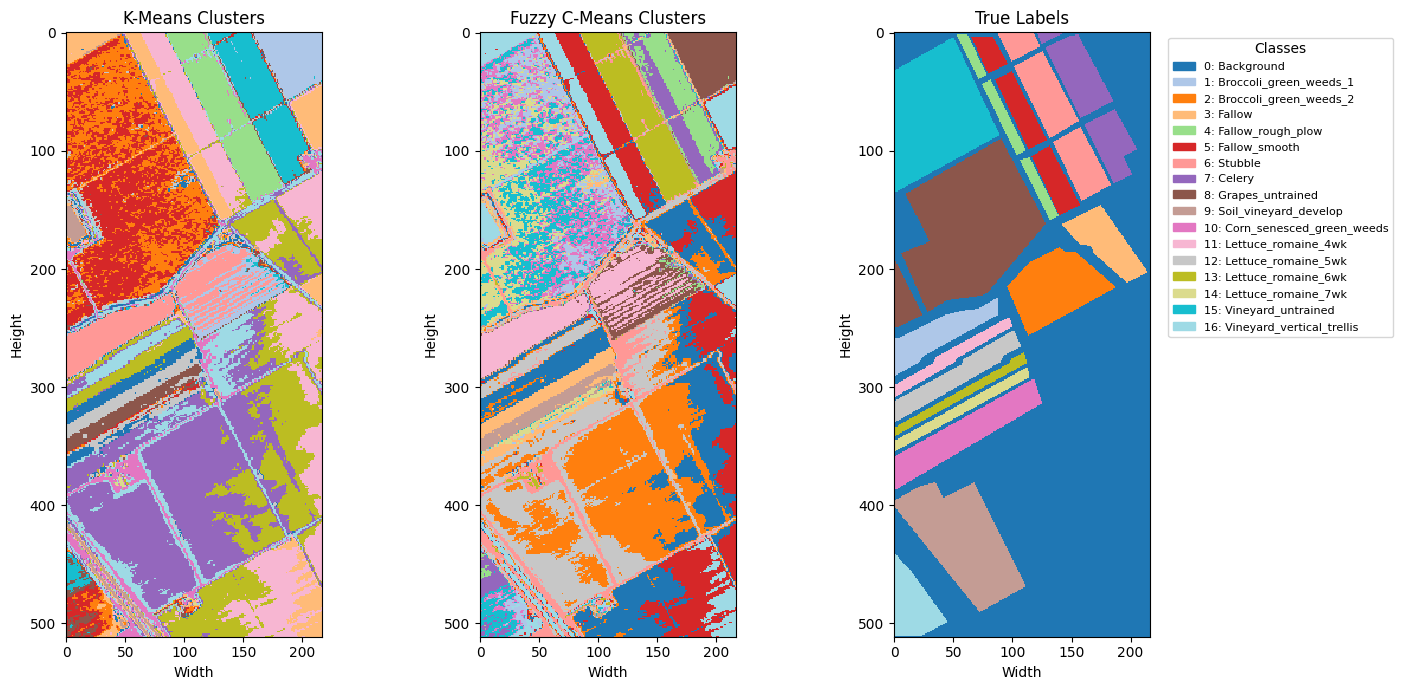

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Define label names (mapping to class indices)
label_names = [
    "Background", "Broccoli_green_weeds_1", "Broccoli_green_weeds_2",
    "Fallow", "Fallow_rough_plow", "Fallow_smooth", "Stubble",
    "Celery", "Grapes_untrained", "Soil_vineyard_develop",
    "Corn_senesced_green_weeds", "Lettuce_romaine_4wk",
    "Lettuce_romaine_5wk", "Lettuce_romaine_6wk",
    "Lettuce_romaine_7wk", "Vineyard_untrained",
    "Vineyard_vertical_trellis"
]

# Create a consistent colormap
num_classes = len(label_names)
cmap = plt.cm.get_cmap('tab20', num_classes)  # Ensure the colormap matches the number of classes

# Create legend patches for each label
handles = [
    mpatches.Patch(color=cmap(i / num_classes), label=f"{i}: {name}")
    for i, name in enumerate(label_names)
]

# Reshape predictions into image format
fuzzy_image = fuzzy_labels.reshape(height, width)  # Fuzzy C-Means predictions
kmeans_image = predicted_labels.reshape(height, width)  # K-Means predictions
true_image = reshaped_labels.reshape(height, width)  # Ground truth labels

# Plot the images
plt.figure(figsize=(15, 7))

# K-Means predictions
plt.subplot(1, 3, 1)
plt.imshow(kmeans_image, cmap=cmap, interpolation='nearest', vmin=0, vmax=num_classes-1)
plt.title("K-Means Clusters")
plt.xlabel("Width")
plt.ylabel("Height")

# Fuzzy C-Means predictions
plt.subplot(1, 3, 2)
plt.imshow(fuzzy_image, cmap=cmap, interpolation='nearest', vmin=0, vmax=num_classes-1)
plt.title("Fuzzy C-Means Clusters")
plt.xlabel("Width")
plt.ylabel("Height")

# True labels for reference
plt.subplot(1, 3, 3)
plt.imshow(true_image, cmap=cmap, interpolation='nearest', vmin=0, vmax=num_classes-1)
plt.title("True Labels")
plt.xlabel("Width")
plt.ylabel("Height")

# Add a single shared legend
plt.legend(
    handles=handles,
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    title="Classes",
    fontsize=8
)

# Adjust layout
plt.tight_layout()
plt.show()


### 5. Μείωση διαστατικότητας δεδομένων

5.α. Εφαρμόστε στα δεδομένα τη μέθοδο μείωσης διαστατικότητας PCA. Επιλέξτε `n_components=3`

In [ ]:
from sklearn.decomposition import PCA

n_components = 3
pca = PCA(n_components=n_components)
pca_transformed = pca.fit_transform(reshaped_image)

print(f"Shape of PCA-transformed data: {pca_transformed.shape}")  # (N, 3)

Shape of PCA-transformed data: (111104, 3)


5.β. Τι ποσοστό της διακύμανσης των δεδομένων διατηρείτε με `n_components=3` ?
Hint: sklearn.decomposition.PCA.explained_variance_ratio_

In [ ]:
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")
print(f"Total Explained Variance: {sum(pca.explained_variance_ratio_):.4f}")

Explained Variance Ratio: [0.74473713 0.23531325 0.01134124]
Total Explained Variance: 0.9914


### 6. Συνδυασμός μείωσης διαστατικότητας και kmeans

6.α. Εφαρμόστε τον αλγόριθμο kmeans στα δεδομένα μειωμένης διαστατικότητας `n_components=3`, και υπολογίστε εκ νέου τις μετρικές. Τι συμπεράσματα βγάζετε;

6.β. Δοκιμάστε διαφορετικές τιμές για το n_components (από 1 έως 5) και τρέχτε εκ νέου κάθε φορα τον k-means, υπολογίζοντας τα τελικά score. Για κάθε μετρική, φτιάχτε ένα διάγραμμα που στον άξονα των Χ θα έχει τον αριθμό n_components και στον άξονα των Υ, την τιμή της μετρικής. Τι συμπεράσματα βγάζετε;

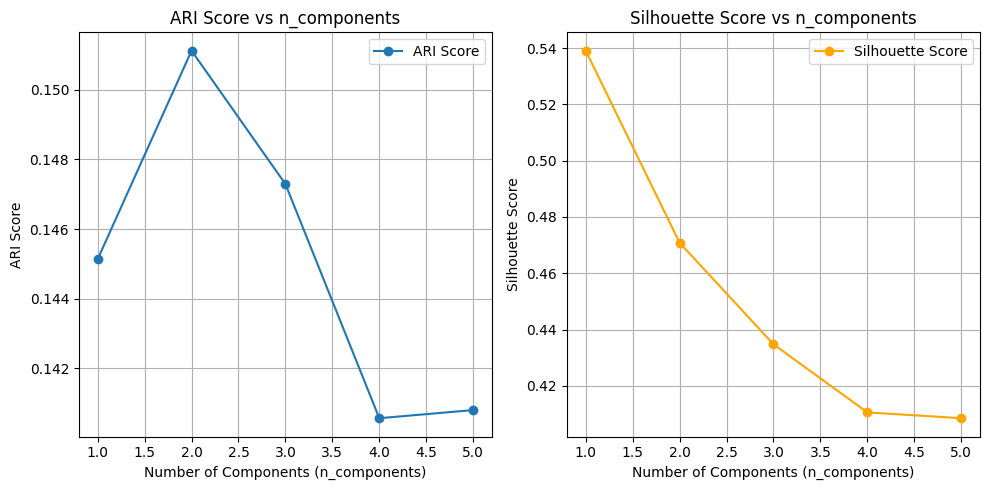

In [ ]:
n_components_range = range(1, 6)
ari_scores = []
silhouette_scores = []

for n_components in n_components_range:
    #apply pca dimensionality reduction for each no components
    pca = PCA(n_components=n_components)
    pca_transformed = pca.fit_transform(reshaped_image)

    #calculate k-means each time
    kmeans_pca = KMeans(n_clusters=17, random_state=42, n_init="auto").fit(pca_transformed)
    pca_predicted_labels = kmeans_pca.labels_

    #calculate matrics
    ari_scores.append(adjusted_rand_score(reshaped_labels, pca_predicted_labels))
    silhouette_scores.append(silhouette_score(pca_transformed, pca_predicted_labels))

#ARI
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(n_components_range, ari_scores, marker='o', label="ARI Score")
plt.title("ARI Score vs n_components")
plt.xlabel("Number of Components (n_components)")
plt.ylabel("ARI Score")
plt.grid()
plt.legend()

#Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(n_components_range, silhouette_scores, marker='o', label="Silhouette Score", color='orange')
plt.title("Silhouette Score vs n_components")
plt.xlabel("Number of Components (n_components)")
plt.ylabel("Silhouette Score")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

# Μέρος 2: Χρήση προεκπαιδευμένου CNN για συσταδοποίηση

Σε αυτό το μέρος, θα χρησιμοποιήσουμε τη βιβλιοθήκη **Keras**, η οποία παρέχει εύκολη ενσωμάτωση προεκπαιδευμένων μοντέλων CNN και ευκολία στη διαχείριση δεδομένων. Στόχος μας είναι να αναδείξουμε τη δύναμη των χαρακτηριστικών που εξάγονται από προεκπαιδευμένα CNN (Convolutional Neural Networks) για τη συσταδοποίηση δεδομένων τηλεπισκόπησης.

Θα χρησιμοποιήσουμε ένα υποσύνολο από το σύνολο δεδομένων **EuroSAT**, το οποίο αποτελείται από δορυφορικές εικόνες κατανεμημένες σε 10 κατηγορίες (π.χ., καλλιέργειες, δάση, αστικές περιοχές). Τα χαρακτηριστικά που θα εξάγουμε από ένα προεκπαιδευμένο CNN θα χρησιμοποιηθούν για την ομαδοποίηση των εικόνων.

---

## 1. Φόρτωση του συνόλου δεδομένων

Για τους σκοπούς αυτής της άσκησης, θα χρησιμοποιήσουμε το σύνολο δεδομένων **EuroSAT**. Το EuroSAT περιλαμβάνει δορυφορικές εικόνες οργανωμένες σε φακέλους κατά κατηγορία.

---

### 1.α. Κατέβασμα και αποσυμπίεση του EuroSAT

Το EuroSAT δεν υποστηρίζεται απευθείας από το Keras, αλλά μπορείτε να το κατεβάσετε και να το αποσυμπιέσετε με τις παρακάτω εντολές:

```bash
# Κατέβασμα του EuroSAT
!wget https://madm.dfki.de/files/sentinel/EuroSAT.zip --no-check-certificate

# Αποσυμπίεση του αρχείου
!unzip EuroSAT.zip
```

### 1.β. Ενσωμάτωση του Keras μέσω TensorFlow
Η βιβλιοθήκη Keras είναι ενσωματωμένη στο TensorFlow. Για να τη χρησιμοποιήσετε, πρέπει να εισάγετε τη βιβλιοθήκη TensorFlow και να χρησιμοποιήσετε τις κλάσεις της Keras μέσω του tensorflow.keras.

Παρακάτω φαίνεται πώς να φορτώσετε το EuroSAT χρησιμοποιώντας το ImageDataGenerator:


In [ ]:
!wget https://madm.dfki.de/files/sentinel/EuroSAT.zip --no-check-certificate

--2024-12-07 18:17:23--  https://madm.dfki.de/files/sentinel/EuroSAT.zip
Resolving madm.dfki.de (madm.dfki.de)... 131.246.195.183
Connecting to madm.dfki.de (madm.dfki.de)|131.246.195.183|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 94280567 (90M) [application/zip]
Saving to: ‘EuroSAT.zip.2’

EuroSAT.zip.2        13%[=>                  ]  11.79M  98.6KB/s    eta 16m 45s^C


In [ ]:
!unzip EuroSAT.zip

Archive:  EuroSAT.zip
replace 2750/River/River_479.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace 2750/River/River_479.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace 2750/River/River_479.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input

data_dir = os.path.join('2750')
print(f'Τα δεδομένα βρίσκονται στο: {data_dir}')

# Κανονικοποίηση και φόρτωση των δεδομένων
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.90  # φορτώνουμε ένα μικρό μέρος από κάθε κλάση για γρηγορότερα τρεξίματα θέτοντας μεγάλο validation percentage και φορτώνοντας το training
)

dataset = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224), # το mobilenetv3 δέχεται εικόνες μεγέθους 224 x 224
    batch_size=10, # κάθε κλήση του iterator φορτώνει ένα ζεύγος image - label
    shuffle=False,
    subset='training'
)

print(f'Φορτώθηκαν {len(dataset) * dataset.batch_size} εικόνες.')


Τα δεδομένα βρίσκονται στο: 2750
Found 2700 images belonging to 10 classes.
Φορτώθηκαν 2700 εικόνες.


---

## 2. Χρήση προεκπαιδευμένου CNN για Εξαγωγή Χαρακτηριστικών

Σε αυτό το βήμα, θα χρησιμοποιήσετε το προεκπαιδευμένο μοντέλο **MobileNetV3Small**, το οποίο είναι διαθέσιμο μέσω της Keras. Το μοντέλο είναι εκπαιδευμένο στο σύνολο δεδομένων **ImageNet** και μπορεί να χρησιμοποιηθεί για την εξαγωγή ισχυρών χαρακτηριστικών από εικόνες. Αυτά τα χαρακτηριστικά θα χρησιμοποιηθούν για τη συσταδοποίηση των δεδομένων.

---

### 2.α. Δημιουργία Εξαγωγέα Χαρακτηριστικών

1. **Φόρτωση του MobileNetV3Small**:
   - Χρησιμοποιήστε τη βιβλιοθηκη `tensorflow.keras.applications` για να φορτώσετε το προεκπαιδευμένο μοντέλο **MobileNetV3Small**.
   - Φροντίστε να ρυθμίσετε την παράμετρο `include_top=False` για να αφαιρέσετε το τελικό στρώμα ταξινόμησης.

2. **Pooling**:
   - Ενεργοποιήστε τη μέθοδο μέσου όρου (average pooling) στο τελικό στρώμα με την παράμετρο `pooling='avg'`. Αυτό θα εξασφαλίσει τη συμπύκνωση των χαρακτηριστικών σε έναν διαχειρίσιμο αριθμό διαστάσεων.


In [ ]:
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load the pre-trained MobileNetV3Small model
base_model = MobileNetV3Small(include_top=False, weights='imagenet', pooling='avg')

# Summary of the model (optional)
#base_model.summary()

### 2.β. Εξαγωγή Χαρακτηριστικών από τις Εικόνες

Χρησιμοποιήστε τον εξαγωγέα χαρακτηριστικών που δημιουργήσατε για να επεξεργαστείτε το σύνολο δεδομένων (`dataset`) και να εξαγάγετε τα χαρακτηριστικά των εικόνων μέσω της μεθόδου `.predict()`. Αποθηκεύστε τα εξαγόμενα χαρακτηριστικά σε μια μεταβλητή και εκτυπώστε τις διαστάσεις τους για να επιβεβαιώσετε ότι η εξαγωγή έγινε σωστά. Τα χαρακτηριστικά αυτά θα χρησιμοποιηθούν στο επόμενο βήμα για συσταδοποίηση.


In [ ]:
import numpy as np
from tensorflow.keras.applications import MobileNetV3Small

# Initialize lists to store features and labels
features = []
labels = []

# Extract features using MobileNetV3Small
print("Starting feature extraction...")
for batch_images, batch_labels in dataset:
    # Extract features for the entire batch
    batch_features = base_model.predict(batch_images)  # Feature extraction

    # Append features and labels
    features.append(batch_features)
    labels.append(batch_labels)

    # Stop if we've processed the entire dataset
    if len(features) * dataset.batch_size >= dataset.samples:
        break

# Combine all batches into numpy arrays
features_array = np.vstack(features)  # Stack all feature batches into a single array
labels_array = np.argmax(np.vstack(labels), axis=1)  # Convert one-hot labels to integers

# Print dimensions of the extracted features and labels
print("Feature extraction completed.")
print("Shape of extracted features:", features_array.shape)  # (N, feature_dim)
print("Shape of labels:", labels_array.shape)  # (N,)


Starting feature extraction...
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━

### 2.γ. Εξαγωγή Χαρακτηριστικών από τις Εικόνες

Εφαρμόστε τον αλγόριθμο **KMeans** στα χαρακτηριστικά που εξήχθησαν θέτωντας αριθμό συστάδων 10, και υπολογίστε τη μετρική Adjusted Rand Index.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# Set number of clusters
n_clusters = 10

# Apply KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init="auto")
predicted_labels = kmeans.fit_predict(features_array)  # Cluster the extracted features

# Compute Adjusted Rand Index (ARI)
ari_score = adjusted_rand_score(labels_array, predicted_labels)

# Print results
print("Adjusted Rand Index (ARI):", ari_score)


Adjusted Rand Index (ARI): 0.5013959271388106


### 2δ: Συσταδοποίηση Χρησιμοποιώντας Μόνο τις τιμές των Pixel

Σε αυτήν την τελευταία φάση, θα επαναλάβετε τη συσταδοποίηση **χωρίς τη χρήση προεκπαιδευμένου μοντέλου CNN**, αλλά χρησιμοποιώντας μόνο τα pixel των εικόνων ως χαρακτηριστικά.

1. **Κανονικοποίηση των Pixel**:
   - Κάθε εικόνα πρέπει να αναδιαταχθεί σε έναν μονοδιάστατο πίνακα και να κανονικοποιηθεί στις τιμές [0, 1].

2. **Ενοποίηση Δεδομένων**:
   - Συνδυάστε τα δεδομένα από όλες τις εικόνες σε έναν μεγάλο πίνακα με διαστάσεις `(N, M)`, όπου:
     - `N`: Ο αριθμός των εικόνων.
     - `M`: Ο αριθμός των pixel κάθε εικόνας.

3. **Εφαρμογή του KMeans**:
   - Χρησιμοποιήστε τον αλγόριθμο KMeans για τη συσταδοποίηση των εικόνων.

4. **Υπολογισμός Μετρικών**:
   - Υπολογίστε τον Adjusted Rand Index.

5. **Σύγκριση Αποτελεσμάτων**:
   - Συγκρίνετε τα αποτελέσματα με τη συσταδοποίηση που έγινε χρησιμοποιώντας τα χαρακτηριστικά από το CNN.

---


In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# Αρχικοποίηση λιστών για αποθήκευση δεδομένων και ετικετών
pixel_features = []
pixel_labels = []

# Φόρτωση και επεξεργασία δεδομένων (raw pixel values)
print("Ξεκινά η διαδικασία επεξεργασίας raw pixel values...")
for batch_images, batch_labels in dataset:
    # Αναδιάταξη εικόνων σε μονοδιάστατους πίνακες και κανονικοποίηση [0, 1]
    reshaped_images = batch_images.reshape(batch_images.shape[0], -1) / 255.0  # Normalize pixel values

    # Αποθήκευση των raw pixel features και ετικετών
    pixel_features.append(reshaped_images)
    pixel_labels.append(batch_labels)

    # Έλεγχος για να σταματήσουμε όταν επεξεργαστούμε όλα τα δεδομένα
    if len(pixel_features) * dataset.batch_size >= dataset.samples:
        break

# Συνένωση όλων των δεδομένων σε numpy arrays
pixel_features_array = np.vstack(pixel_features)
pixel_labels_array = np.argmax(np.vstack(pixel_labels), axis=1)  # Μετατροπή one-hot labels σε ακέραιες ετικέτες

print("Επεξεργασία ολοκληρώθηκε.")
print("Σχήμα χαρακτηριστικών pixel:", pixel_features_array.shape)  # (N, M)
print("Σχήμα ετικετών:", pixel_labels_array.shape)  # (N,)

# Εφαρμογή KMeans για συσταδοποίηση
print("Εφαρμογή KMeans...")
kmeans_raw = KMeans(n_clusters=10, random_state=42, n_init="auto")
predicted_raw_labels = kmeans_raw.fit_predict(pixel_features_array)

# Υπολογισμός Adjusted Rand Index (ARI)
ari_raw = adjusted_rand_score(pixel_labels_array, predicted_raw_labels)
print("Adjusted Rand Index (ARI) με raw pixel values:", ari_raw)

# Συγκρίσεις με CNN χαρακτηριστικά
print("Σύγκριση:")
print("- ARI με χαρακτηριστικά CNN:", ari_score)
print("- ARI με raw pixel values:", ari_raw)


Ξεκινά η διαδικασία επεξεργασίας raw pixel values...
Επεξεργασία ολοκληρώθηκε.
Σχήμα χαρακτηριστικών pixel: (2700, 150528)
Σχήμα ετικετών: (2700,)
Εφαρμογή KMeans...
Adjusted Rand Index (ARI) με raw pixel values: 0.15124704474444664
Σύγκριση:
- ARI με χαρακτηριστικά CNN: 0.5013959271388106
- ARI με raw pixel values: 0.15124704474444664


### 2.ε. Οπτικοποίηση αποτελεσμάτων

Χρησιμοποιήστε τα αποτελέσματα της συσταδοποίησης τόσο από τα χαρακτηριστικά που εξήχθησαν μέσω του CNN όσο και από τις τιμές των pixel. Για κάθε μέθοδο, επιλέξτε τυχαία 5 εικόνες από κάθε συστάδα και απεικονίστε τες σε ένα πλέγμα (grid), με χρήση της βιβλιοθήκης matplotlib.

Εξηγήστε τα αποτελέσματα της συσταδοποίησης:
- Είναι εμφανής ο διαχωρισμός των εικόνων σε συστάδες;
- Παρατηρείτε κοινά χαρακτηριστικά ή μοτίβα στις εικόνες κάθε συστάδας;
- Πώς συγκρίνονται οι συστάδες που δημιουργήθηκαν από τα χαρακτηριστικά του CNN με αυτές που δημιουργήθηκαν από τις τιμές των pixel;

Αναλύστε εάν η χρήση των χαρακτηριστικών που εξήχθησαν από το CNN βοήθησε στον καλύτερο διαχωρισμό των δεδομένων και πώς αυτό αντανακλά στις συστάδες και τα περιεχόμενά τους.

Collected all images: (2700, 224, 224, 3)
Collected all labels: (2700,)
Visualizing clusters from CNN features...


<ipython-input-13-e3d3effb999c>:51: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


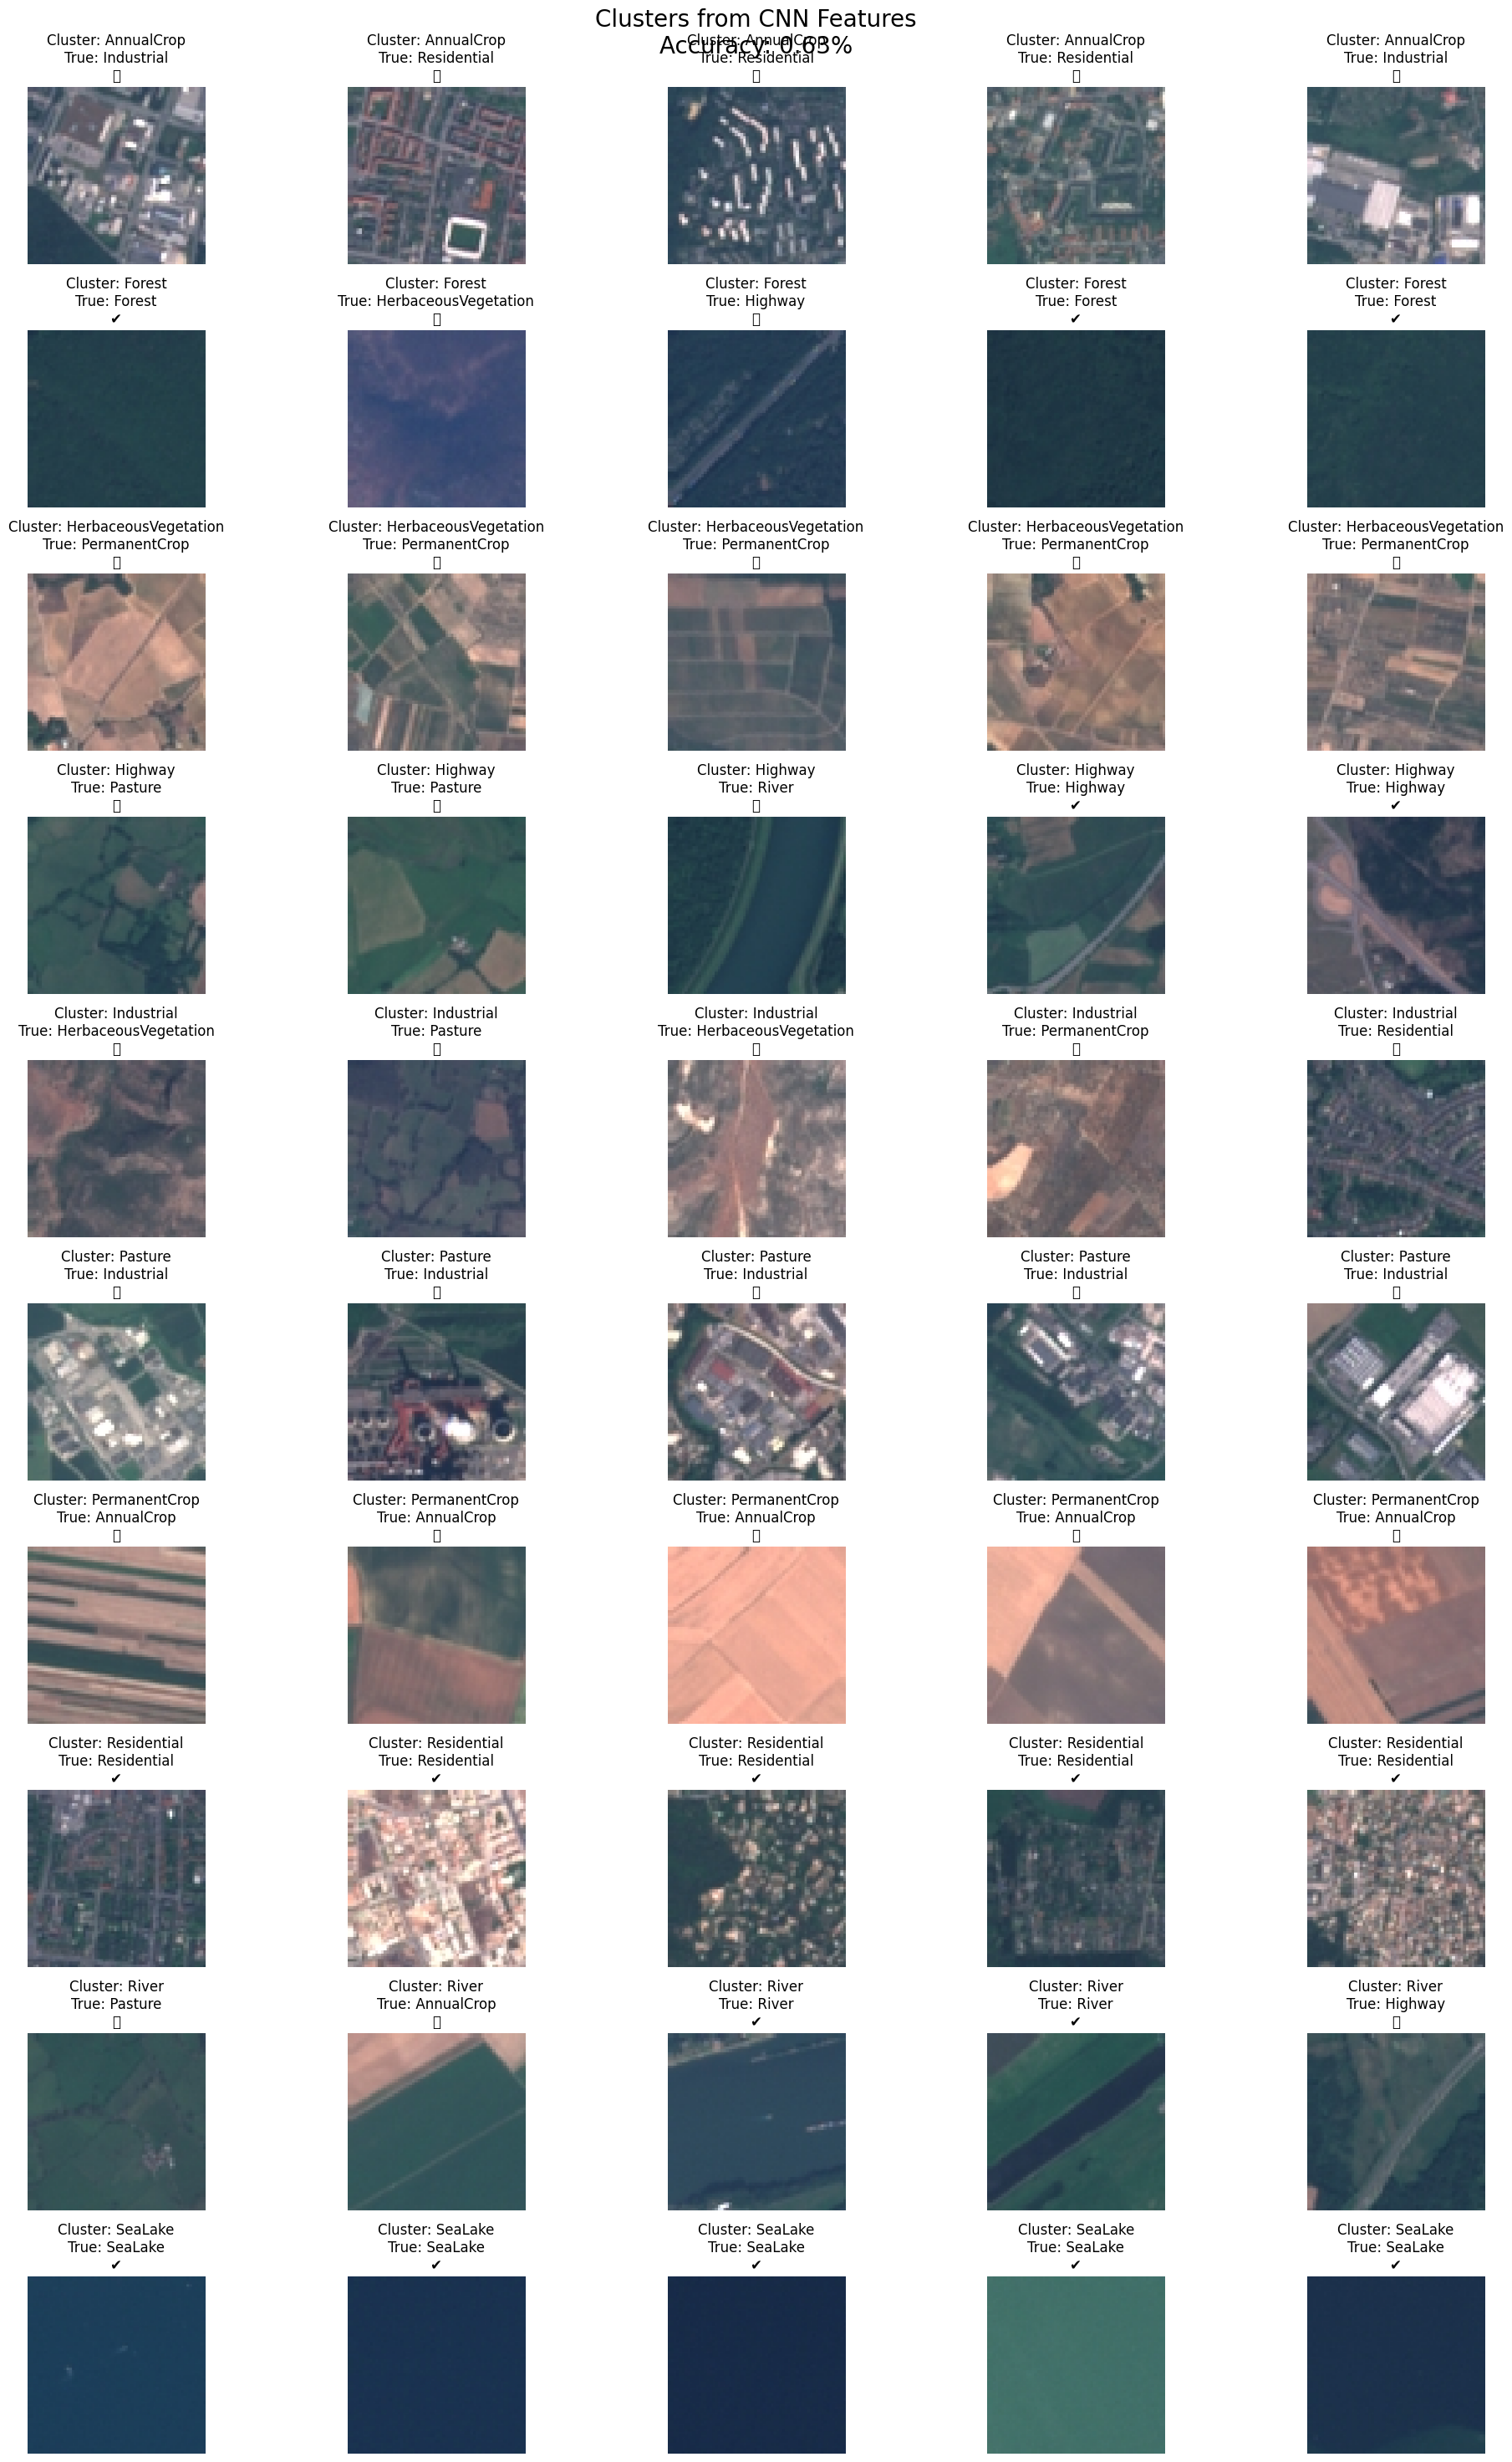

Visualizing clusters from raw pixel values...


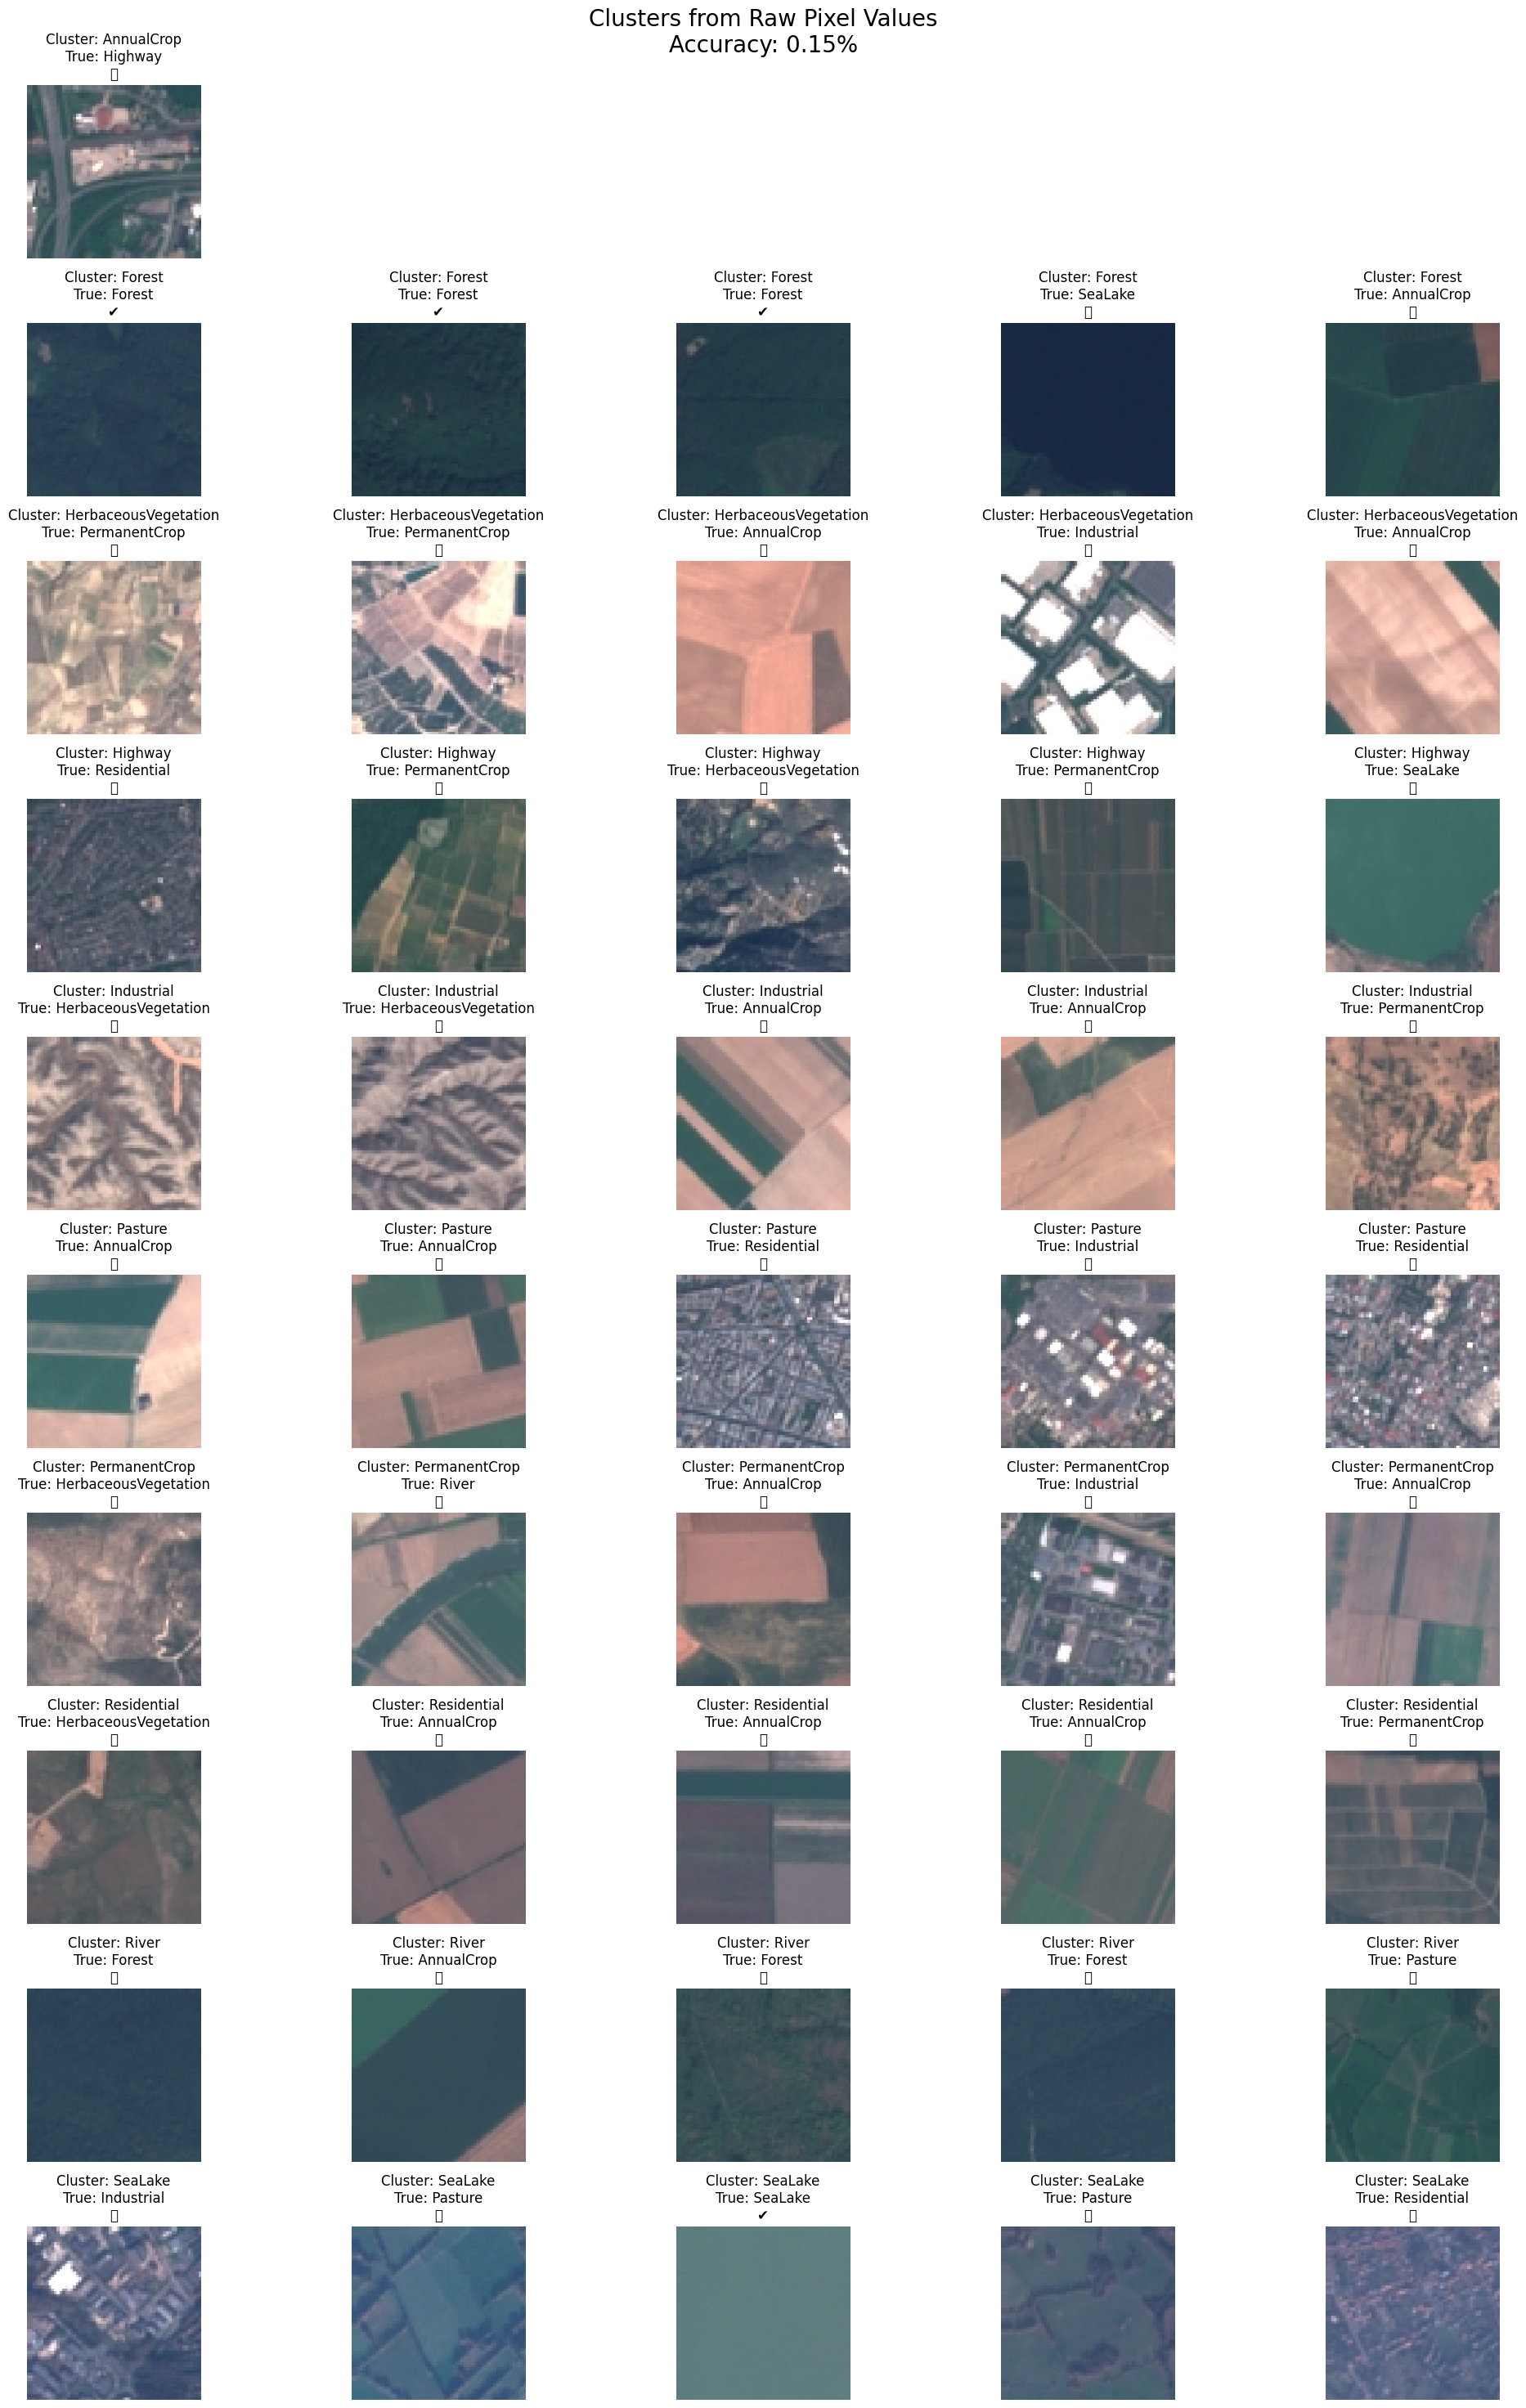

In [ ]:
import matplotlib.pyplot as plt
import random
import numpy as np

def visualize_clusters_with_accuracy(images, true_labels, cluster_labels, class_names, n_clusters, title):
    """
    Visualizes clusters in a grid and displays the true labels of images in each cluster,
    along with whether the image was correctly classified. Also calculates accuracy.

    Parameters:
    - images: Array of all images (e.g., all_images_array).
    - true_labels: Array of true labels for the images.
    - cluster_labels: Cluster labels (e.g., predicted_labels or predicted_raw_labels).
    - class_names: List of class names corresponding to the true labels.
    - n_clusters: Number of clusters to display.
    - title: Title for the plot.
    """
    correct_count = 0
    total_count = len(images)

    plt.figure(figsize=(20, n_clusters * 3))

    for cluster in range(n_clusters):
        # Find indices of images that belong to this cluster
        cluster_indices = [i for i, lbl in enumerate(cluster_labels) if lbl == cluster]

        # Randomly select up to 5 images from this cluster
        selected_indices = random.sample(cluster_indices, min(5, len(cluster_indices)))

        for j, idx in enumerate(selected_indices):
            # Create a subplot for each image
            plt.subplot(n_clusters, 5, cluster * 5 + j + 1)
            plt.imshow(images[idx].astype('uint8'))  # Display the image
            plt.axis('off')

            # True label and cluster information
            true_label = class_names[true_labels[idx]]
            predicted_label = class_names[cluster]
            is_correct = (true_label == predicted_label)

            # Count correct predictions
            if is_correct:
                correct_count += 1

            # Title with recognition result
            plt.title(f"Cluster: {predicted_label}\nTrue: {true_label}\n{'✔️' if is_correct else '❌'}")

    # Calculate and display overall accuracy
    accuracy = (correct_count / total_count) * 100
    plt.suptitle(f"{title}\nAccuracy: {accuracy:.2f}%", fontsize=20)
    plt.tight_layout()
    plt.show()

# Collect all images and labels from the dataset
all_images = []
all_labels = []

for batch_images, batch_labels in dataset:
    all_images.append(batch_images)
    all_labels.append(batch_labels)

    # Stop when all samples are processed
    if len(all_images) * dataset.batch_size >= dataset.samples:
        break

# Combine all batches into single arrays
all_images_array = np.vstack(all_images)  # Shape: (N, 224, 224, 3)
all_labels_array = np.argmax(np.vstack(all_labels), axis=1)  # Convert one-hot to integer labels

# Extract class names from the dataset
class_names = list(dataset.class_indices.keys())  # Class names corresponding to the labels

print("Collected all images:", all_images_array.shape)  # (N, 224, 224, 3)
print("Collected all labels:", all_labels_array.shape)  # (N,)

# Visualize clusters using CNN features
print("Visualizing clusters from CNN features...")
visualize_clusters_with_accuracy(
    images=all_images_array,  # Use the collected array of all images
    true_labels=all_labels_array,  # True labels of the images
    cluster_labels=predicted_labels,  # Cluster labels from KMeans on CNN features
    class_names=class_names,  # Class names corresponding to the true labels
    n_clusters=10,
    title="Clusters from CNN Features"
)

# Visualize clusters using raw pixel values
print("Visualizing clusters from raw pixel values...")
visualize_clusters_with_accuracy(
    images=all_images_array,  # Use the collected array of all images
    true_labels=all_labels_array,  # True labels of the images
    cluster_labels=predicted_raw_labels,  # Cluster labels from KMeans on raw pixel values
    class_names=class_names,  # Class names corresponding to the true labels
    n_clusters=10,
    title="Clusters from Raw Pixel Values"
)
